# importing required libs

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading dataset
train=pd.read_csv('bigdatamart_Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


As we can see there are 12 columns, where 11 columns are the Independent Variables (Feature), where 3 out of 11 columns are containing Continuous data (1 column is containing integer as well) and 7 columns consist of categorical Values (Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type and Outlet_Type).We can also see that it consists of a dependent variable i.e Item_Outlet_Sales column. Depending upon the 12 different features we need to predict the sales of Bigmart. So, it is a Regression Problem.

In [3]:
# checking the test dataset
test = pd.read_csv('bigdatamart_Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


As we can see the test dataset is containing 11 columns, where all the 11 columns are the Independent Variables (Feature), where 3 out of 11 columns are containing Continuous data (1 column is containing integer as well) and 7 columns consist of categorical Values (Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type and Outlet_Type). But in this case the Label data is missing as we will use this dataset to predict the sale . So we will go through each and every column of this dataset like the training dataset. And will check the result in the end.

In [4]:
# checking datatypes
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

As we can see there are different data types are present in Train dataset. The columns, like Item_Identifier, Item_Fat_Content, Item_Type,Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Type are containing objects. Item_Weight, Item_Visibility, Item_MRP and Item_Outlet_Sales are containing floats. And Outlet_Establishment_Year is containing integers only.

In [5]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

As we can see there are different data types are present in test dataset also. The columns, like Item_Identifier, Item_Fat_Content, Item_Type,Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Type are containing objects. Item_Weight, Item_Visibility, Item_MRP are containing floats. And Outlet_Establishment_Year is containing integers only.

In [6]:
#checking the shape of the data
train.shape

(8523, 12)

train dataset is having 8523 rows and 12 columns.

In [7]:
# checking test dataset shape
test.shape

(5681, 11)

test dataset is having 5681 rows and 11 columns

In [8]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [10]:
# getting the info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


As we can see most of the columns are containing 8523 counts of values whereas Item_Weight is containing 7060, Outlet_Size is containg 6113 counts of values. It means there is missing values in those columns that will need to deal with during data cleaning of train dataset.

In [11]:
# test  dataset info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


As we can see most of the columns are containing 5681 counts of values whereas Item_Weight is containing 4705, Outlet_Size is containg 4075 counts of values. It means there is missing values in those columns that will need to deal with during data cleaning of test dataset.

In [12]:
# stats summary
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


As the dataset is containing 8523 count of values, there is some missing values present in Item_weight as it contains 7060 out of 8523 counts of values.
In Item Visibility the minimum value is showing 0.000000, which is not possible in real time, so there maybe some skewness present that we need to deal with later.
Minimum Item_MRP is the price of each product , so it shows the price ranges from 31.29 to 266.88.
The different outlets established on different years ranges from 1985 to 2009.

In [13]:
# test dataset stats summary
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


As the dataset is containing 5681 count of values, there is some missing values present in Item_weight as it contains 4705 out of 8523 counts of values.
In Item Visibility the minimum value is showing 0.000000, which is not possible in real time, so there maybe some skewness present that we need to deal with later.
Minimum Item_MRP is the price of each product , so it shows the price ranges from 31.99 to 266.58.
The different outlets established on different years ranges from 1985 to 2009.

In [14]:
# checking null values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

here are some missing values present in Item_weight column and Outlet_size of train dataset. So, the count of the missing values is 1463 for ItemWeight and 2410 for Outlet Size. We will correct those missing values in data cleaning part.

In [15]:
# checking null values for test dataset
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

As we have already seen there are some missing values present in Item_weight column and Outlet_size of test dataset as well. So, the count of the missing values is 976 for ItemWeight and 1606 for Outlet Size. We will correct those missing values in data cleaning part.

# Let's check the distribution of continuous independent variables first,

In [16]:
# only taking the continuous features of train dataset:
train_features=train[['Item_Weight',
       'Item_Visibility', 'Item_MRP']]

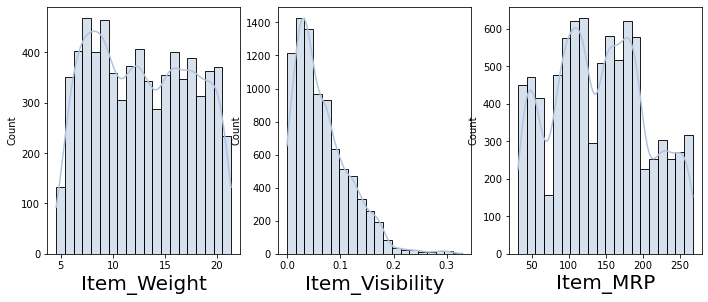

In [17]:
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1
for column in train_features:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.histplot(train_features[column],kde=True,bins=20,color='lightsteelblue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show();

In this case it's obvious to having little bit of skewness in Item_weight as it shows the weight of different things.
But ist's not possible Item_Visibility to be '0'. We need to take care of the skewness as well as it is right skewed.
In case of Item_MRP it's obvious to having little bit of skewness in Item_MRP as it shows the price of different things.

In [18]:
# only taking the continuous features of test dataset:
test_features = test[['Item_Weight',
       'Item_Visibility', 'Item_MRP']]

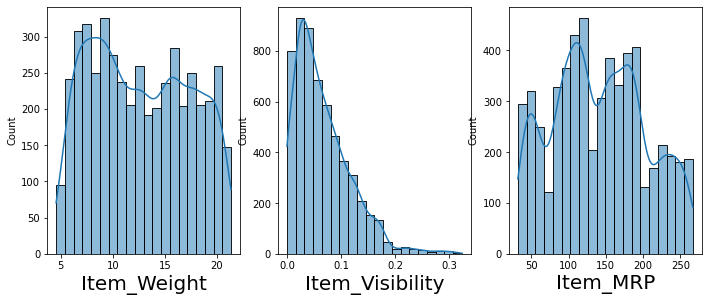

In [19]:
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1
for column in test_features:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.histplot(test_features[column],kde=True,bins=20)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show();

In test dataset also it's obvious to having little bit of skewness in Item_weight as it shows the weight of different things.
But ist's not possible Item_Visibility to be '0'. We need to take care of the skewness as well as it is right skewed.
In case of Item_MRP it's obvious to having little bit of skewness in Item_MRP as it shows the price of different things.

#  Check the outliers of both the datasets:

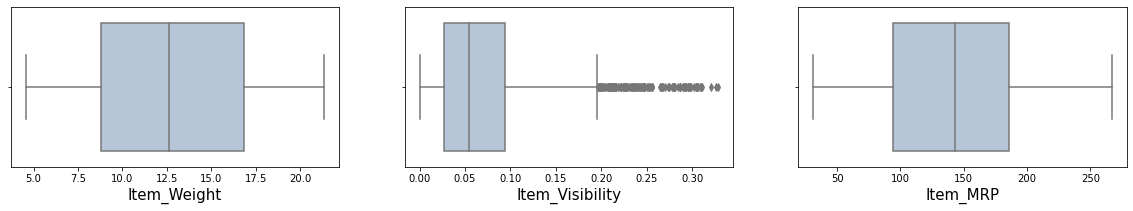

In [20]:
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1
for column in train_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(train_features[column],color='lightsteelblue')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show();

there is outliers present in Item_Visibility variable in train dataset

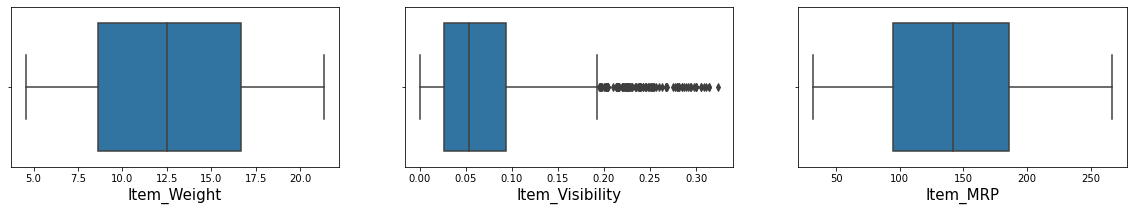

In [21]:
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1
for column in test_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(test_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show();

there is outliers present in Item_Visibility variable in test dataset as well

check the categorical variables of train and test dataset also:

For analyzing first we will use value_counts() method then visualization technique.

In [22]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

there are 5 types fat content present in 'Item_Fat_Content' variable of train dataset. And each of the different variant is having different counts. AS it seems that Low Fat,low fat,LF all are same and Reguler, reg are same it can be corrected as 'Low' and 'Reguler'. That we will do in data cleaning part.

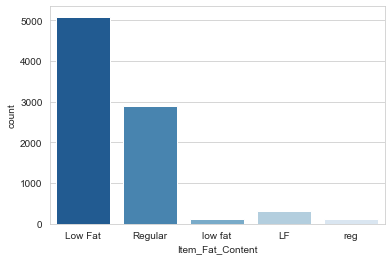

In [23]:
sns.set_style('whitegrid')
sns.countplot(train['Item_Fat_Content'],palette='Blues_r');

 the outlets mainly stocks up low fat products more. Maybe Low fat products sell more than Reguler fat content products. We can check that sale vs product's fat content relation in bivariate analysis. And as it seems Low fat,low_fat,LF all are same and Reguler and Reg are same we will combine these into two categories only before model creation.

# check the same column of test dataset as well:

In [24]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

 there are 5 types fat content present in 'Item_Fat_Content' variable of test dataset. And each of the different variant is having different counts. As it seems that Low Fat,low fat,LF all are same and Reguler, reg are same it can be corrected as 'Low' and 'Reguler

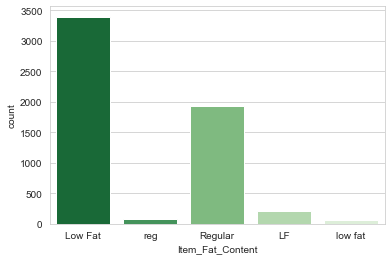

In [25]:
sns.set_style('whitegrid')
sns.countplot(test['Item_Fat_Content'],palette='Greens_r');

may be Low fat products sell more than Reguler fat content products regarding to test dataset. And as it seems Low fat,low_fat,LF all are same and Reguler and Reg are same we will combine these into two categories only before model prediction.

# check the Item_type variable of train dataset:

In [26]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

here are 16 different categories of things with 16 different values are present in the Item_type variable. Where fruirs and vegetables are highest in counts 1232 and seafood has lowest in counts 64 in train dataset.

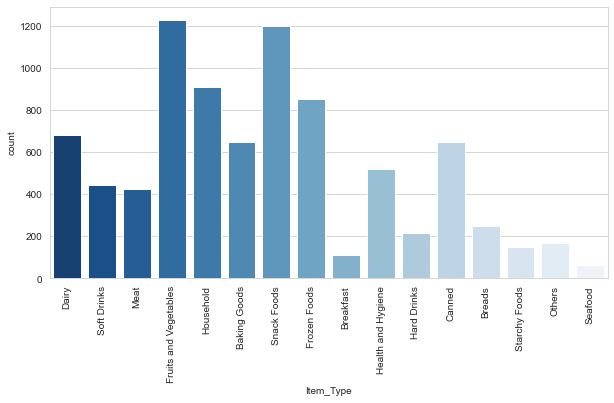

In [27]:
#Let's visualize it:

plt.figure(figsize=(10,5))
sns.countplot(train['Item_Type'],palette='Blues_r')
plt.xticks(rotation=90)
plt.show();

As we can see followed by fruits and vegetables, Snack food is in 2nd highest in counts regarding to the train dataset. And House hold things, Frozen food, baking goods,canned food and dairy are also in the higherer side according to counts. Meat,soft drinks, health and hygine care products are in average counts. Lastly Breakfast, hard drinks etc these are lower in counts.

In [28]:
#check the Item_type in test dataset:

test['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

 there are 16 different categories of things with 16 different values are present in the Item_type variable in test dataset. Where fruirs and vegetables are highest in counts 789 and seafood has lowest in counts 25 in this dataset.

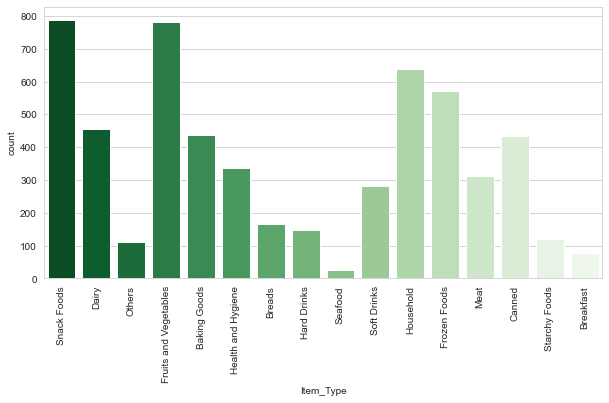

In [29]:
#Let's visualize it:

plt.figure(figsize=(10,5))
sns.countplot(test['Item_Type'],palette='Greens_r')
plt.xticks(rotation=90)
plt.show();

we can see followed by fruits and vegetables, Snack food is in 2nd highest in counts regarding to the test dataset. And House hold things, Frozen food, baking goods,canned food and dairy are also in the higherer side according to counts. Meat,soft drinks, health and hygine care products are in average counts. Lastly Breakfast, hard drinks etc these are lower in counts.

In [30]:
#check the 'Outlet_Establishment_Year' variable of train dataset:

train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

This column is containing the establishment years of the stores in train dataset. It ranges from 1985 to 2009.

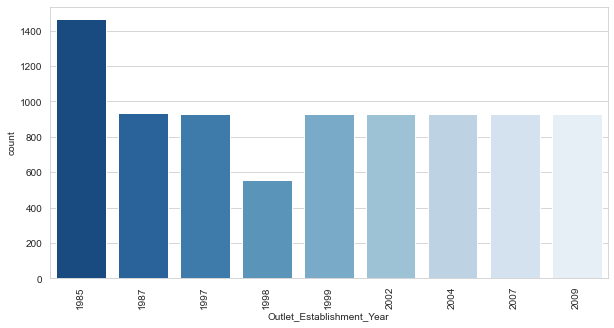

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(train['Outlet_Establishment_Year'],palette='Blues_r')
plt.xticks(rotation=90)
plt.show();

A big numbers of the stores are established on 1985. And in 1998 the number is lowest.

In [32]:
test['Outlet_Establishment_Year'].value_counts()

1985    976
1987    621
2004    620
1997    620
1999    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64

This column is containing the establishment years of the stores in test dataset as well. It ranges from 1985 to 2009 as well.

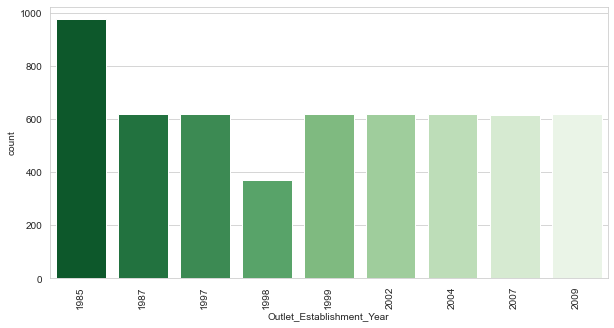

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(test['Outlet_Establishment_Year'],palette='Greens_r')
plt.xticks(rotation=90)
plt.show();

A highest number of the stores are established on 1985. And in 1998 the number is lowest.

In [34]:
#check the 'Outlet_Size' variable of train dataset:

train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

the outlet size varies by High, Medium and Low and Medium sized stores are highest in counts i.e 2793 where as small size stores are 2388 in counts and Highest size stores are in lowest in counts i.e 932.

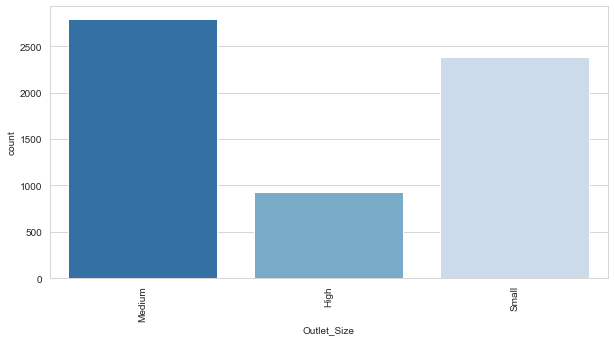

In [35]:
#Let's visualize the outlet size of train dataset:

plt.figure(figsize=(10,5))
sns.countplot(train['Outlet_Size'],palette='Blues_r')
plt.xticks(rotation=90)
plt.show();

As we have already seen the medium sized outlets are highest in numbers, small sized outlets are 2nd highest in numbers and Bigger sized outlets are lowest in numbers.

In [36]:
#check the test dataset as well:

test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

As we can see the outlet size varies by High, Medium and Low and Medium sized stores are highest in counts i.e 1862 where as small size stores are 1592 in counts and Highest size stores are in lowest in counts i.e 621.

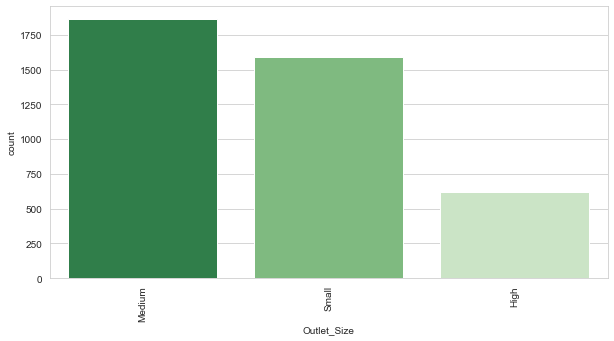

In [37]:
#Let's visualize the outlet size of test dataset:

plt.figure(figsize=(10,5))
sns.countplot(test['Outlet_Size'],palette='Greens_r')
plt.xticks(rotation=90)
plt.show();

As we have already seen the medium sized outlets are highest in numbers, small sized outlets are 2nd highest in numbers and Bigger sized outlets are lowest in numbers.

In [38]:
#Now let's check the column Outlet_Location_Type in train dataset:

train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

As we can say by seeing the train dataset that these outlets are situated in tier 1, tier 2 and tier 3 cities. Where tier 3 cities are having 3350 counts of outlets(highest),tier 2 cities are having 2785 outlets and tier 1 cities are having 2388 outlets(lowest count).

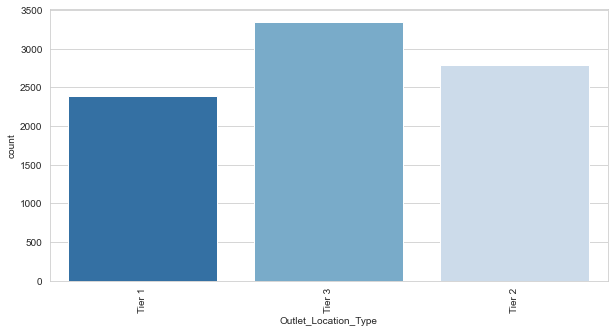

In [39]:
#Now let's visualize this:

plt.figure(figsize=(10,5))
sns.countplot(train['Outlet_Location_Type'],palette='Blues_r')
plt.xticks(rotation=90)
plt.show();

As we have already underdand that tier 3 cities are having highest counts of outlets where as tier 2 and tier 1 cities are having 2nd highest and lowest counts of outlets respectively as according to train dataset.

In [40]:
#check the same column of test dataset as well:

test['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

As we can say by seeing the test dataset that these outlets are situated in tier 1, tier 2 and tier 3 cities. Where tier 3 cities are having 2233 counts of outlets(highest),tier 2 cities are having 1856 outlets and tier 1 cities are having 1592 outlets(lowest count).

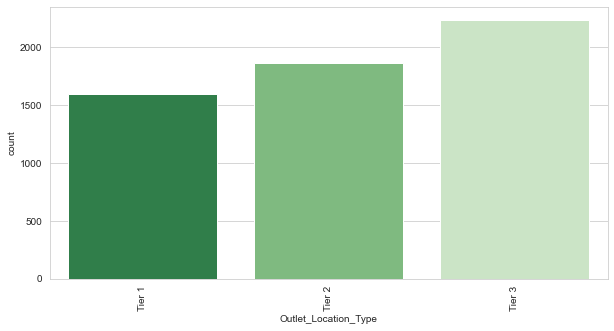

In [41]:
#let's visualize this:

plt.figure(figsize=(10,5))
sns.countplot(test['Outlet_Location_Type'],palette='Greens_r')
plt.xticks(rotation=90)
plt.show();

As we have already underdand that tier 3 cities are having highest counts of outlets where as tier 2 and tier 1 cities are having 2nd highest and lowest counts of outlets respectively as according to test dataset.

In [42]:
#Now let's check the Outlet_Type column of train dataset:

train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

As we can see there are 3 types of supermarkets and 1 grocery store present in this train dataset. Supermaeket type1 is the highest in number 5577, Grocery store is in 2nd highest in number 1083, 3rd highest in counts is Supermarket type3 i.e 935 and Supermarket type2 is having 928 counts.

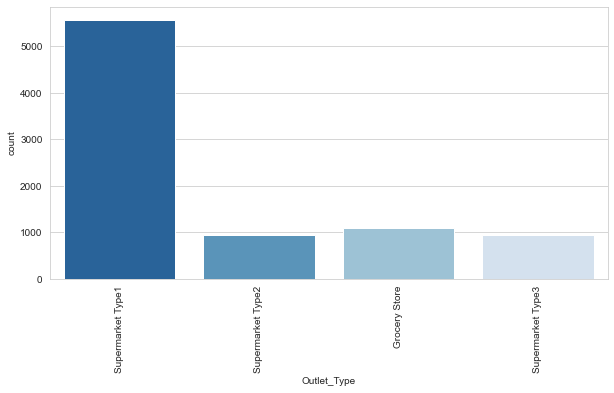

In [43]:
#Let's visualize it:

plt.figure(figsize=(10,5))
sns.countplot(train['Outlet_Type'],palette='Blues_r')
plt.xticks(rotation=90)
plt.show();

As we can see supermarket type 1 is highest in numbers and supermarket type 2 and 3 are almost same in counts and grocery store is 2nd highest in number but the difference of supermarket type 1 and grocery store is big.

In [44]:
#check the test dataset as well:

test['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

As we can see there are 3 types of supermarkets and 1 grocery store present in this test dataset. Supermaeket type1 is the highest in number 3717, Grocery store is in 2nd highest in number 722, 3rd highest in counts is Supermarket type3 i.e 624 and Supermarket type2 is having 618 counts.

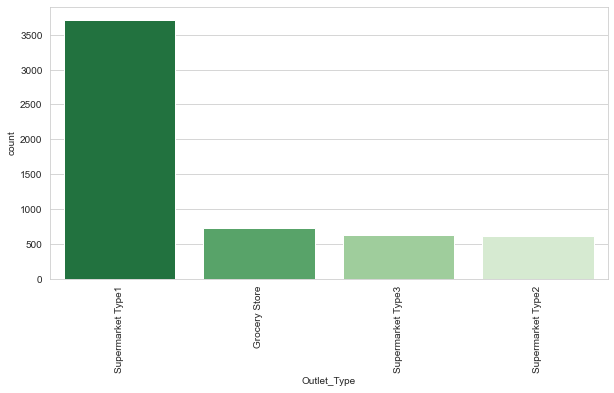

In [45]:
#Let's visualize it:

plt.figure(figsize=(10,5))
sns.countplot(test['Outlet_Type'],palette='Greens_r')
plt.xticks(rotation=90)
plt.show();

As we can see supermarket type 1 is highest in numbers and supermarket type 2 and 3 are almost same in counts and grocery store is 2nd highest in number but the difference of supermarket type 1 and grocery store is big

check the relations beween features vs label. First we will check the relations of continuous variables with label then categorical variables with label:

## Bivariate Analysis:
We will do Bivariate Analysis only in train dataset as it contains the label. So, first we will divide the train dataset in features and label before checking the relation.

In [46]:
# dividing the feature and label for further operations:
y = train['Item_Outlet_Sales']
x = train.drop(columns=['Item_Outlet_Sales'])
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


 visualize the relation between features and label of train dataset:

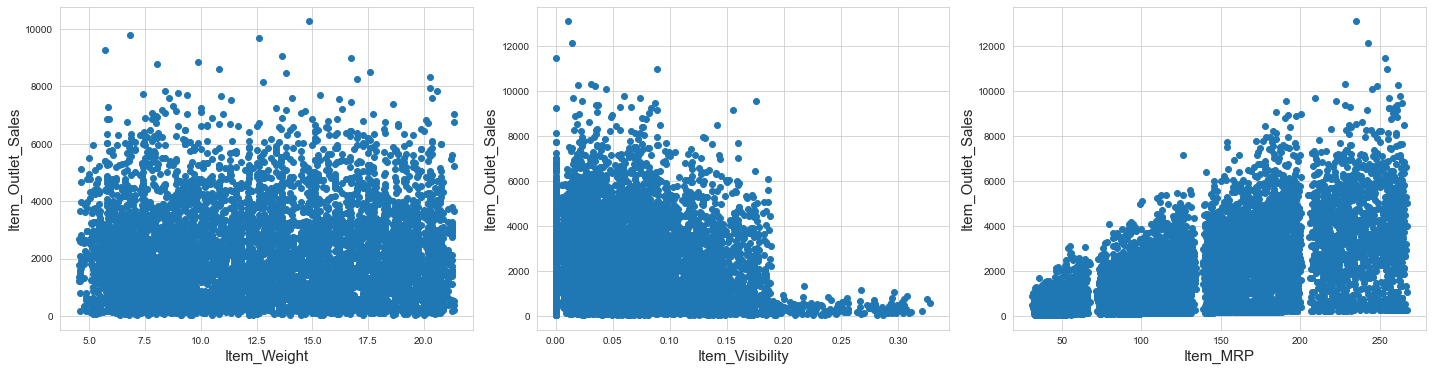

In [47]:
#For checking we are using scatter plot.

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in train_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(train_features[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Item_Outlet_Sales',fontsize=15)
    plotnumber+=1
plt.tight_layout();

As we can see, there is a positive correlation between Item_MRP with Item_Outlet_Sales.


The relation betweem Item_weight with item_outlet_sales is somewhat confusing or they are maybe not related that much.
less visibility more Item_outlet_sale.


Now let's check the relations between Categorical features with Label:

For that we are checking relation between 'Item_Type' and 'Item_Outlet_Sales', let's do it:

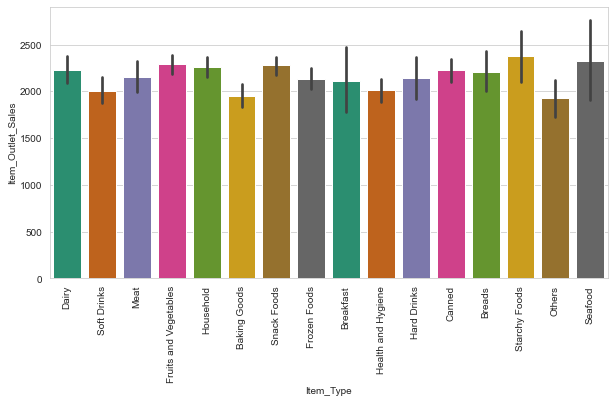

In [48]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train,palette='Dark2')
plt.xticks(rotation=90)
plt.show();

the sales of all the different categories of the products are more or less similer. There is no such product that sells most out of these categories.

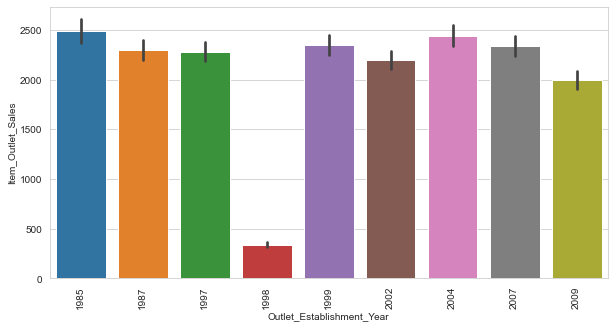

In [49]:
#Now let's check relation between 'Outlet_Establishment_Year' and 'Item_Outlet_Sales':
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train)
plt.xticks(rotation=90)
plt.show()

As we can see with respect to item_outlet_sale in 1985 it was highest, followed by 2004,2007,1999. The lowest selling was 1998 according to train dataset.

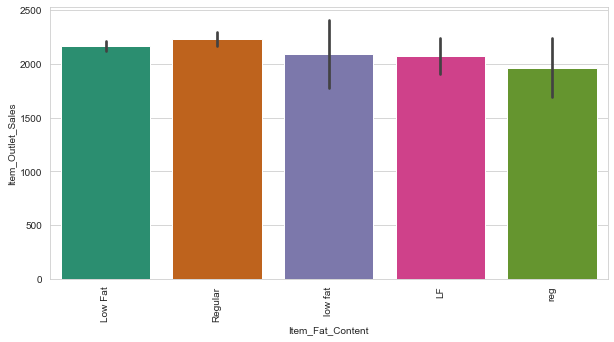

In [50]:
#Now let's check relation between 'Item_Fat_Content' and 'Item_Outlet_Sales':

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',palette='Dark2',data=train)
plt.xticks(rotation=90)
plt.show();

As we can see sell of Reguler fat content products are little higher than low fat content food items.

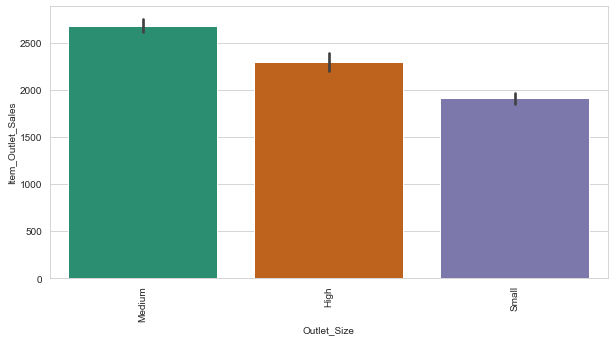

In [51]:
#Now let's check relation between 'Outlet_Size' and 'Item_Outlet_Sales':

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',palette='Dark2',data=train)
plt.xticks(rotation=90)
plt.show()

As we can see, in selling point of view Medium sized Outlets are doing more transactions than big sized outlets and small sized outlets.

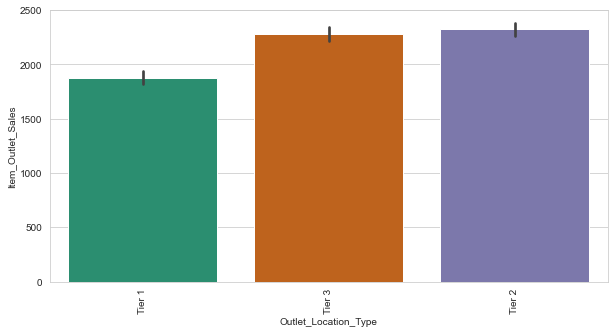

In [52]:
#Now let's check relation between 'Outlet_Location_Type' and 'Item_Outlet_Sales':

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',palette='Dark2',data=train)
plt.xticks(rotation=90)
plt.show()

As we can see tier 2 cities are making more Item_Outlet_Sales than tier 3 and tier 1 cities.

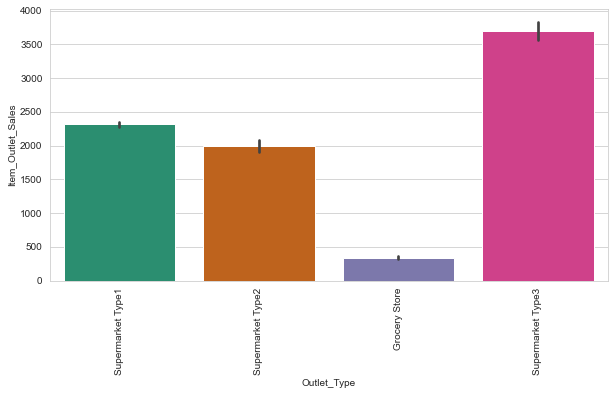

In [53]:
#Now let's check relation between 'Outlet_Type' and 'Item_Outlet_Sales':

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',palette='Dark2',data=train)
plt.xticks(rotation=90)
plt.show()

As we can see supermarket type3 of outlet_type is very much positively connected with Item_outlet_sales than supermarket type1 and supermarket type2. And relation of Grocery store with Item_outlet_sales is lowest.

## Multivariate Analysis:

## Multicolinearity Detection:

Let's find the coefficient of multicolinearty to check if any feature is correlated to another featue or not. We will check presence of multicolinearity for both of the datasets(train and test):

In [54]:
corr = train.corr()
corr.shape

(5, 5)

# Let's plot a heatmap for the train dataset first:

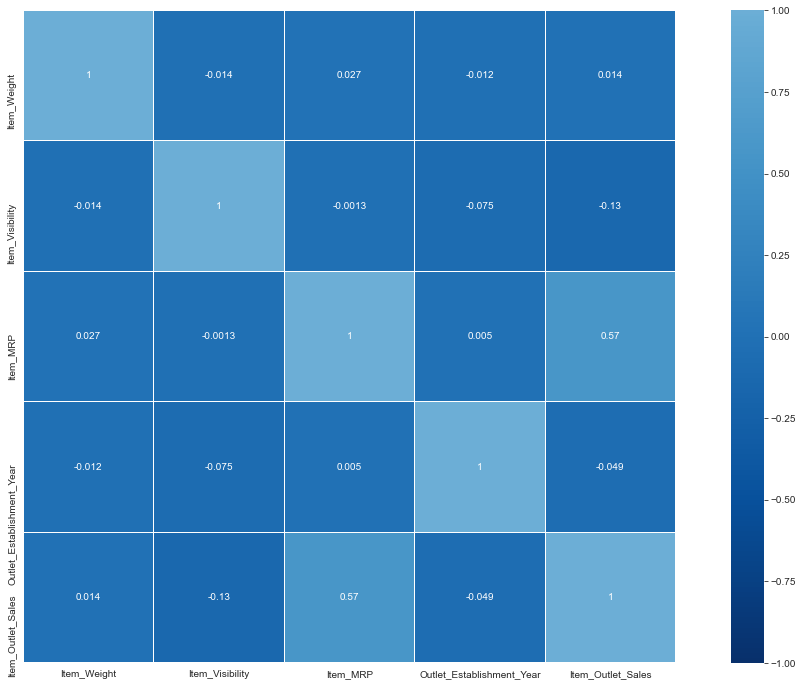

In [55]:

#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(20,12))
sns.heatmap(corr,cbar=True,cmap='Blues_r',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

 Item_MRP and dependent variable Item_outlet_sales is positively correlated, that is a good thing. Other things are also looking good. No feature is correlated.

In [56]:
corr2 = test.corr()
corr2.shape

(4, 4)

# Let's plot a heatmap for the test dataset as well:

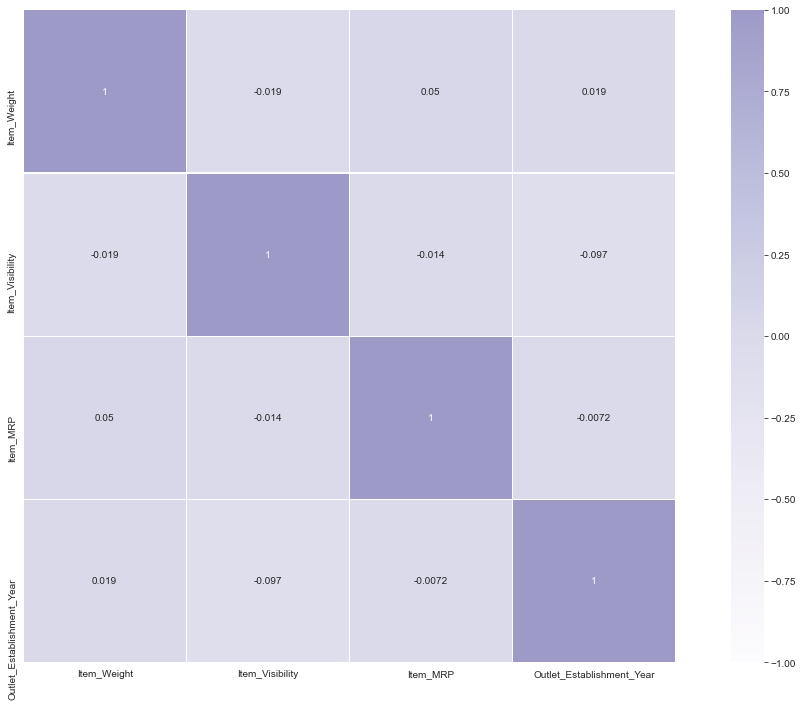

In [57]:

plt.figure(figsize=(20,12))
sns.heatmap(corr2,cbar=True,cmap='Purples',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

As we can see, Not a single feature is correlated.

## Data preprocessing:

As we have already seen that both the datasets are having null values, zero values and nominal columns, we need to take care of those before any model creation and model prediction. Let's do it:

Firstly we will check the skewness of train dataset.

In [58]:
train.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

We can see, there is no major skewness in the dataset, but 'item_Visibility' is somewhat right skewed.

The integer data type column 'Outlet_Establishment_Year' is showing negative skewness as the estabishment have done in different years in different manner . So, we can not say it's really skewed.

Now we are going to replace zeroes('0') with mean of the same column Item_Weight,Item_Visibility of train dataset as it's not possible in real world to have zero values in these columns.

In [59]:
train['Item_Weight']=train['Item_Weight'].replace(0,train['Item_Weight'].mean())
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())

As these columns are having skewness , we are going to use power transformer to remove those skewness, for that we are taking those columns in a different variable 'features'.

In [60]:
features=['Item_Weight','Item_Visibility']

After that we will use power transformer to making these variables more normally distribution like.

In [61]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='box-cox')

After that we will use Box-cox method of power transformer .

In [62]:
train[features]=scaler.fit_transform(train[features].values)

Power Transformer is also helping in scaling the perticular variables.

In [63]:
train[features]

,Item_Weight,Item_Visibility
0,-0.724816,-1.501937
1,-1.607953,-1.316587
2,0.994429,-1.458786
3,1.306332,0.174855
4,-0.814400,0.174855
...,...,...
8518,-1.344453,-0.035286
8519,-0.950337,-0.285645
8520,-0.420708,-0.645619
8521,-1.251896,1.395813


As we can see the variables are scaled.


Now let's check the distribution of the variables( 'Item_Weight' and 'Item_visibility' ) of train dataset.

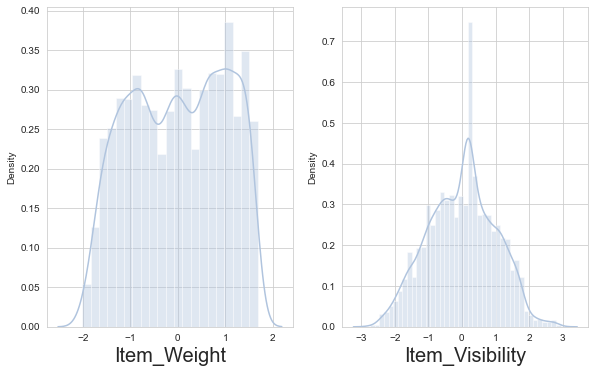

In [64]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in train[features]:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(train[column],kde=True,color='lightsteelblue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

As we can see, now the variables of train dataset are looking more normal than before.


Now let's do the same with test dataset as well.

In [65]:
test.skew()

Item_Weight                  0.129975
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

We can see, there is no major skewness in the test dataset, but 'item_Visibility' is somewhat right skewed.


The integer data type column 'Outlet_Establishment_Year' is showing negative skewness as the estabishment have done in different years in different manner . So, we can not say it's really skewed.


Now we are going to replace zeroes('0') with mean of the same column Item_Weight,Item_Visibility of test dataset as it's not possible in real world to have zero values in these columns.

In [66]:
test['Item_Weight']=test['Item_Weight'].replace(0,test['Item_Weight'].mean())
test['Item_Visibility']=test['Item_Visibility'].replace(0,test['Item_Visibility'].mean())

In [67]:
features2=['Item_Weight','Item_Visibility']  # Doing the same thing that we have done with train dataset
scaler=PowerTransformer(method='box-cox')
test[features2]=scaler.fit_transform(test[features2].values)
test[features2]

,Item_Weight,Item_Visibility
0,1.582787,-2.199431
1,-0.924458,-0.539111
2,0.476526,0.793172
3,-1.185006,-1.555224
4,NaN,1.073814
...,...,...
5676,-0.391101,-1.682918
5677,-1.107989,1.387778
5678,-0.507249,0.334333
5679,0.612404,0.172221


After scaling we are going to see if there any skewness present or not in those variables of test dataset.

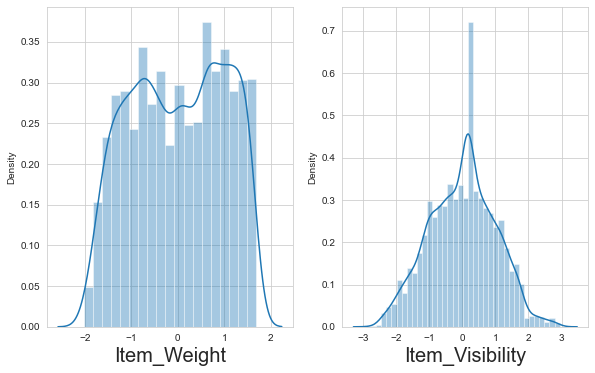

In [68]:

plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in test[features2]:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(test[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

 both the columns are looking better than before.
    
Missing value replace:
    
    
Now next step is to replace those missing values of Item_Weight column of train dataset with mean of the same column.

In [69]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)
train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

As we can see there is no missing value present in Item_Weight of train dataset.


Now we are going to do the same with the test dataset as the column 'Item_Weight' is having missing values.

In [70]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)
test.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

As we can see there is no missing value present in Item_Weight column of test dataset.


Now we are going to replacing the missing values of 'Outlet_size' with 0 of train dataset.

In [71]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(0) #replacing nan with 0.
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

now there is no missing value present in the train dataset.


Let's do the same with test dataset to eliminate the missing values.

In [72]:
test['Outlet_Size'] = test['Outlet_Size'].fillna(0) #replacing nan with 0.
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

So there is no missing value present in the test dataset as well.

In [73]:
print(len(train.select_dtypes(include=['int64', 'float64']).columns), len(train.select_dtypes(include='object').columns))

5 7


In [74]:
print(len(test.select_dtypes(include=['int64', 'float64']).columns),len(test.select_dtypes(include='object').columns))

4 7


Since the column Outlet_Establishment_Year of train dataset shows the established year , it can be assumed that it till exists so assuming that outlets are still active we can get the number of years the outlet has been active for by substracting the establishment year from the current year(2021).

In [75]:
train['Outlet_Active_for'] = train['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 
train= train.drop(columns=['Outlet_Establishment_Year'])
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Active_for
0,FDA15,-0.724816,Low Fat,-1.501937,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,-1.607953,Regular,-1.316587,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,0.994429,Low Fat,-1.458786,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,1.306332,Regular,0.174855,Fruits and Vegetables,182.0950,OUT010,0,Tier 3,Grocery Store,732.3800,23
4,NCD19,-0.814400,Low Fat,0.174855,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


So, we have created a different column 'outlet_active_for' as replacement of the column Outlet_establishment_year as we can see above table of train dataset.
Now Dropping those unnecessory columns are it does not related with prediction

In [76]:
train.drop(columns=['Item_Identifier'],axis=1,inplace=True)
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Active_for
0,-0.724816,Low Fat,-1.501937,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,-1.607953,Regular,-1.316587,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,0.994429,Low Fat,-1.458786,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,1.306332,Regular,0.174855,Fruits and Vegetables,182.0950,OUT010,0,Tier 3,Grocery Store,732.3800,23
4,-0.814400,Low Fat,0.174855,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


As we can see there is no presence of Item_Identifier column.

## Encoding:

Now let's do encode categorical columns as much as possible by using different methods like label encoder and get_dummies.

First we are going to use label encoder for the columns : 'Outlet_identifier','Item_Type' of train dataset

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_s = ['Outlet_Identifier','Item_Type']
for i in le_s:
    train[i] = le.fit_transform(train[i])
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Active_for
0,-0.724816,Low Fat,-1.501937,4,249.8092,9,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,-1.607953,Regular,-1.316587,14,48.2692,3,Medium,Tier 3,Supermarket Type2,443.4228,12
2,0.994429,Low Fat,-1.458786,10,141.6180,9,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,1.306332,Regular,0.174855,6,182.0950,0,0,Tier 3,Grocery Store,732.3800,23
4,-0.814400,Low Fat,0.174855,9,53.8614,1,High,Tier 3,Supermarket Type1,994.7052,34


As we can see, The columns are encoded successfully.


Now we are going to use get_dummies to encode the rest of the categorical column:

In [78]:
 # droping the first column in the one-hot-encoded data to avoid collinearity
train= pd.get_dummies(data=train, drop_first=True)
train.shape

(8523, 19)

In [79]:
train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Active_for,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.724816,-1.501937,4,249.8092,9,3735.1380,22,1,0,0,0,0,1,0,0,0,1,0,0
1,-1.607953,-1.316587,14,48.2692,3,443.4228,12,0,1,0,0,0,1,0,0,1,0,1,0
2,0.994429,-1.458786,10,141.6180,9,2097.2700,22,1,0,0,0,0,1,0,0,0,1,0,0
3,1.306332,0.174855,6,182.0950,0,732.3800,23,0,1,0,0,0,0,0,0,1,0,0,0
4,-0.814400,0.174855,9,53.8614,1,994.7052,34,1,0,0,0,1,0,0,0,1,1,0,0


As we can see now our train dataset is good to be scale and train as all the categorical variables are encoded.




Now it's time to process the test dataset as well. Let's do that.

In [80]:
test['Outlet_Active_for'] = test['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 
test= test.drop(columns=['Outlet_Establishment_Year'])
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Active_for
0,FDW58,1.582787e+00,Low Fat,-2.199431,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,22
1,FDW14,-9.244579e-01,reg,-0.539111,Dairy,87.3198,OUT017,0,Tier 2,Supermarket Type1,14
2,NCN55,4.765262e-01,Low Fat,0.793172,Others,241.7538,OUT010,0,Tier 3,Grocery Store,23
3,FDQ58,-1.185006e+00,Low Fat,-1.555224,Snack Foods,155.0340,OUT017,0,Tier 2,Supermarket Type1,14
4,FDY38,-1.463937e-16,Regular,1.073814,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,36


So, we have created a different column 'outlet_active_for' as replacement of the column Outlet_establishment_year as we can see above table of test dataset.

Dropping the unnecessory column that does not related to label.



In [81]:
test.drop(columns=['Item_Identifier'],axis=1,inplace=True)

As we can see there is no presence of Item_Identifier column.

## Encoding:

Now let's do encode categorical columns as much as possible by using different methods like label encoder and get_dummies.


First we are going to use label encoder for the columns : 'Outlet_identifier','Item_Type' of test dataset.

In [82]:
l = LabelEncoder()
l_s = ['Outlet_Identifier','Item_Type']
for i in l_s:
    test[i] = l.fit_transform(test[i])
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Active_for
0,1.582787e+00,Low Fat,-2.199431,13,107.8622,9,Medium,Tier 1,Supermarket Type1,22
1,-9.244579e-01,reg,-0.539111,4,87.3198,2,0,Tier 2,Supermarket Type1,14
2,4.765262e-01,Low Fat,0.793172,11,241.7538,0,0,Tier 3,Grocery Store,23
3,-1.185006e+00,Low Fat,-1.555224,13,155.0340,2,0,Tier 2,Supermarket Type1,14
4,-1.463937e-16,Regular,1.073814,4,234.2300,5,Medium,Tier 3,Supermarket Type3,36


As we can say both the columns are encoded now.


Now we are going to use get_dummies to encode the rest of the categorical columns

In [83]:
 # droping the first column in the one-hot-encoded data to avoid collinearity
test= pd.get_dummies(data=test, drop_first=True)
test.shape

(5681, 18)

So, all the columns of test dataset is encoded successfully, now its time to train the train dataset. But before that we are going to divide the dataset into independent variables and dependent variable. Let's do that.

In [84]:
y=train['Item_Outlet_Sales']
x=train.drop(columns=['Item_Outlet_Sales'])

Divition of the train dataset is done.


Now let's do scaling as the variables are in different sacles before model creation.


In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# time to build the models

In [86]:
## Importing machine learning Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [87]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std()*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('MAE',mean_absolute_error(y_test,pred))
    print('\n')
    print('MSE',mean_squared_error(y_test,pred))
    print('\n')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sns.regplot(pred,y_test)
    return final_r

# LinearRegression

max r2 score corresponding to 62 is 58.59802272120045


cross validation score 56.12530138763814


Standard Deviation 0.867131821100389


Training accuracy 56.08632423531388


Test Accuracy 57.11530339836486


MAE 858.6692476382086


MSE 1328420.3859028223


RMSE 1152.5712064349093




62

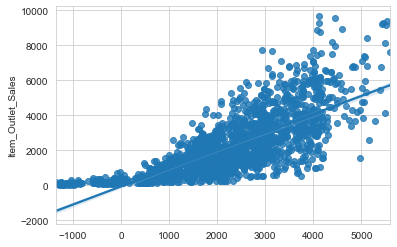

In [88]:
lr = LinearRegression()
maxr2_score(lr,x,y)

# Decision Tree


max r2 score corresponding to 60 is 25.89834361191552


cross validation score 16.788534197246314


Standard Deviation 5.653020510486027


Training accuracy 100.0


Test Accuracy 21.938889902201673


MAE 1070.6212389442815


MSE 2418064.6761569036


RMSE 1555.0127575543886




60

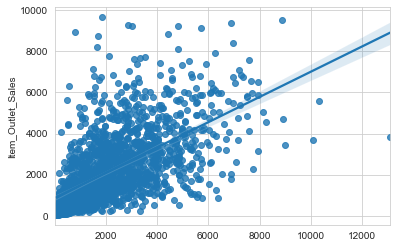

In [89]:
dt = DecisionTreeRegressor()
maxr2_score(dt,x,y)

# KNN

max r2 score corresponding to 89 is 47.606887468459604


cross validation score 42.79326338829955


Standard Deviation 2.94334302092363


Training accuracy 62.00693761156013


Test Accuracy 44.59164954974597


MAE 932.0181579824047


MSE 1716360.1032578782


RMSE 1310.0992722911797




89

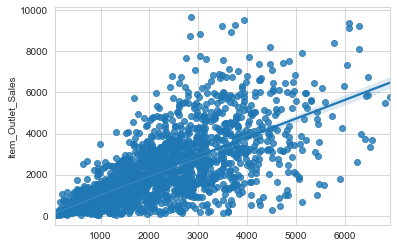

In [90]:
knn = KNeighborsRegressor()
maxr2_score(knn,x,y)

# Ridge

max r2 score corresponding to 62 is 58.59019947400401


cross validation score 56.12439726159327


Standard Deviation 0.8696002416614643


Training accuracy 56.085244160622416


Test Accuracy 57.11262855248385


MAE 858.5814382480122


MSE 1328503.243427279


RMSE 1152.6071505188916




62

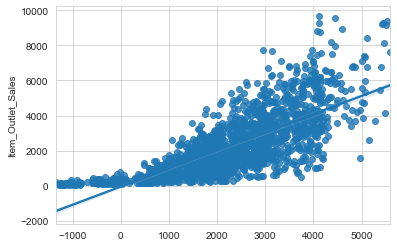

In [91]:
ridge=Ridge()
maxr2_score(ridge,x,y)

# SVM

max r2 score corresponding to 80 is 21.219706720227283


cross validation score 18.507539903641415


Standard Deviation 0.7711725068502474


Training accuracy 18.21025515694965


Test Accuracy 17.84718416130676


MAE 1163.1601985158068


MSE 2544811.645356941


RMSE 1595.2465782307577




80

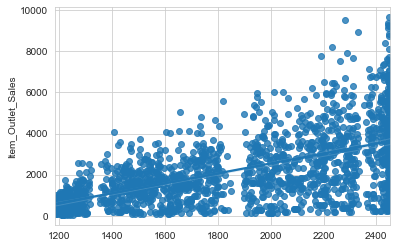

In [92]:
svm = SVR()
maxr2_score(svm,x,y)

# Random Forest

max r2 score corresponding to 76 is 58.4456982754866


cross validation score 54.60162716826861


Standard Deviation 2.292145355741347


Training accuracy 93.64075720247807


Test Accuracy 57.90597083058425


MAE 802.0713634521993


MSE 1303928.228591171


RMSE 1141.896767922202




76

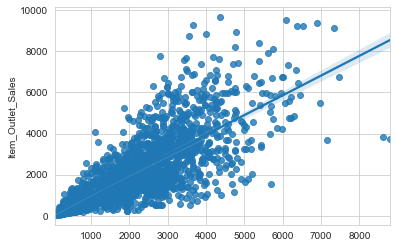

In [93]:
rf = RandomForestRegressor()
maxr2_score(rf,x,y)

We can see from above all the Models that the Random forest gives us a Maximun R2 score.

we will choose this as our model and do Hyperparameter Tuning for the same.

# Hyperparameter Tuning

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=.20)
forest=RandomForestRegressor()
param={'n_estimators':[50,100,200],'max_depth':[10,50,None],'max_features': [1,2,3],'bootstrap': [True, False]}
glf=GridSearchCV(estimator=forest,param_grid=param,scoring='r2',n_jobs=-1)
glf.fit(x_train,y_train)
glf.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'n_estimators': 200}

 Mean Absolute Error (MAE) : 82189.79272862677
Mean Squared Error (MSE) : 136260752.0258075
Root Mean Squared Error : 116730.78087026038
R_2 score: 3.6611743996526336


<AxesSubplot:ylabel='Item_Outlet_Sales'>

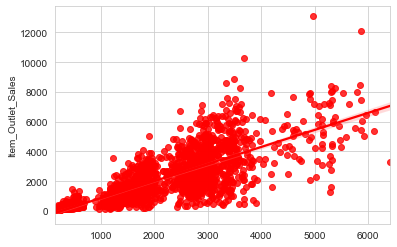

In [95]:
forest=RandomForestRegressor(bootstrap=True,max_depth=10,max_features=3,n_estimators=200)
forest.fit(x_train,y_train)
pred=forest.predict(x_test)
print(' Mean Absolute Error (MAE) :',mean_absolute_error(pred,y_test)*100)
print('Mean Squared Error (MSE) :',mean_squared_error(pred,y_test)*100)
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(pred,y_test))*100)
print('R_2 score:',r2_score(pred,y_test)*100)
## best fit line
sns.regplot(pred,y_test,color='r')

In [98]:
# saving the model
import joblib
joblib.dump(forest,'bigmart.pkl')

['bigmart.pkl']

In [99]:
# loading
loaded_model=joblib.load('bigmart.pkl')
prediction=loaded_model.predict(x_test)

In [100]:
prediction

array([1843.29776409, 1593.19988567,  682.47226092, ..., 1661.82138806,
       3376.70205944, 1402.6540692 ])